In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/spy.csv")
df

,Date,Close,High,Low,Open,Volume
0,2018-01-02,238.568741,238.604254,237.352690,237.743250,86655700
1,2018-01-03,240.077698,240.228607,238.737365,238.737365,90070400
2,2018-01-04,241.089630,241.577844,240.139885,240.725725,80636400
3,2018-01-05,242.696228,242.820482,241.391409,241.888480,83524000
4,2018-01-08,243.140091,243.299858,242.305715,242.598622,57319200
...,...,...,...,...,...,...
1504,2023-12-22,464.874420,466.572378,462.960567,465.080521,67160400
1505,2023-12-26,466.837372,467.750134,465.208124,465.286659,55387000
1506,2023-12-27,467.681427,467.828642,466.091446,466.631244,68000300
1507,2023-12-28,467.858093,468.702145,467.436067,468.044575,77158100


In [87]:
CONFIG = {
    'momentum_lookback': 100,
    'momentum_threshold': 0.05,
    'rsi_period': 14,
    'rsi_entry': 30,
    'rsi_exit': 50,
    'rebalancing_freq': 'W',  
    'stop_loss_pct': 0.05,
    'vol_window': 20,
    'target_vol': 0.02
}


In [88]:
df["ema_200"] = df['Close'].rolling(window=200).mean()


In [78]:
#Momentum signal
df["momentum"] = (df['Close'] / df["Close"].shift(CONFIG["momentum_lookback"])) - 1

In [79]:
#RSI Signal

import pandas_ta as pta

df['RSI'] = pta.rsi(df['Close'], length=CONFIG["rsi_period"])

In [80]:
df["regime"] = np.where(df['Close'] > df['ema_200'],1,0)

In [81]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'ema_200', 'momentum',
       'RSI', 'regime'],
      dtype='object')

In [82]:
df['signal'] = 0

df.loc[(df["regime"]==1) & (df['momentum']>CONFIG['momentum_threshold']), "signal"] = 1
df.loc[(df["regime"]==1) & (df['momentum']< -CONFIG['momentum_threshold']), "signal"] = -1

df.loc[(df["regime"] == 0) & (df["RSI"] < 30), "signal"] = 1
df.loc[(df["regime"] == 0) & (df["RSI"] > 70), "signal"] = -1



In [83]:
#df["signal_cleaned"] = df["signal"].where(df["signal"].shift() != df["signal"], 0)

df["executed_signal"] = df["signal"].shift(1)

df.dropna(inplace=True)

df.to_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/regime_signals.csv")

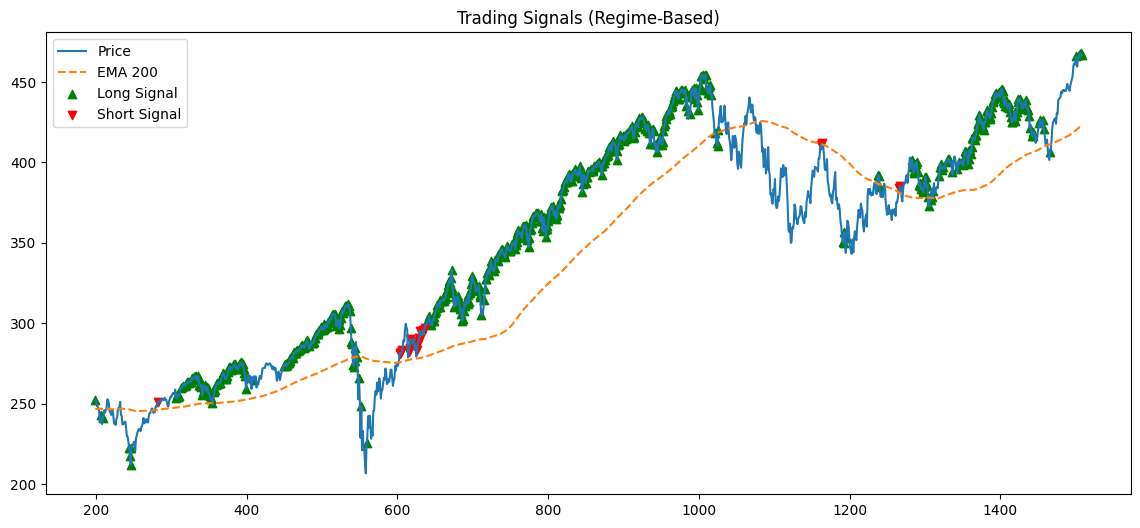

In [84]:
plt.figure(figsize=(14, 6))
plt.plot(df["Close"], label="Price")
plt.plot(df["ema_200"], label="EMA 200", linestyle="--")
plt.scatter(df[df["executed_signal"] == 1].index, df[df["executed_signal"] == 1]["Close"], marker="^", color="green", label="Long Signal")
plt.scatter(df[df["executed_signal"] == -1].index, df[df["executed_signal"] == -1]["Close"], marker="v", color="red", label="Short Signal")
plt.title("Trading Signals (Regime-Based)")
plt.legend()
plt.show()

In [73]:
df[['Close', 'ema_200', 'regime', 'momentum']].iloc[800:1000]


,Close,ema_200,regime,momentum
999,432.842804,410.101692,1,0.039467
1000,440.529633,410.486905,1,0.063090
1001,444.934418,410.882830,1,0.075977
1002,447.702850,411.274054,1,0.073935
1003,454.038788,411.694471,1,0.094517
...,...,...,...,...
1194,349.134430,401.776651,0,-0.110580
1195,343.735596,401.298970,0,-0.095370
1196,352.810638,400.832346,0,-0.073627
1197,363.743042,400.440056,0,-0.029505


In [90]:
df = pd.read_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/regime_signals.csv")
df

,Unnamed: 0,Date,Close,High,Low,Open,Volume,ema_200,momentum,RSI,regime,signal,executed_signal
0,199,2018-10-16,252.147064,252.524757,248.253364,248.729961,118255800,246.666555,0.037148,41.947003,1,0,1.0
1,200,2018-10-17,252.192047,252.821499,249.593229,252.183046,110626000,246.734671,0.039811,42.049855,1,0,0.0
2,201,2018-10-18,248.550079,251.850304,247.264172,251.247801,134557500,246.777033,0.036718,36.423323,1,0,0.0
3,202,2018-10-19,248.415237,251.157911,247.713831,249.206574,139901600,246.813661,0.022511,36.230029,1,0,0.0
4,203,2018-10-22,247.300232,249.413426,246.760682,249.089712,82415800,246.836681,0.024195,34.595131,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1504,2023-12-22,464.874420,466.572378,462.960567,465.080521,67160400,421.428432,0.060245,71.405143,1,1,0.0
1306,1505,2023-12-26,466.837372,467.750134,465.208124,465.286659,55387000,421.897171,0.067782,72.995177,1,1,1.0
1307,1506,2023-12-27,467.681427,467.828642,466.091446,466.631244,68000300,422.372789,0.074572,73.673075,1,1,1.0
1308,1507,2023-12-28,467.858093,468.702145,467.436067,468.044575,77158100,422.818498,0.065676,73.821204,1,1,1.0


In [91]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume',
       'ema_200', 'momentum', 'RSI', 'regime', 'signal', 'executed_signal'],
      dtype='object')

In [92]:
df = df.drop('Unnamed: 0', axis="columns")
df

,Date,Close,High,Low,Open,Volume,ema_200,momentum,RSI,regime,signal,executed_signal
0,2018-10-16,252.147064,252.524757,248.253364,248.729961,118255800,246.666555,0.037148,41.947003,1,0,1.0
1,2018-10-17,252.192047,252.821499,249.593229,252.183046,110626000,246.734671,0.039811,42.049855,1,0,0.0
2,2018-10-18,248.550079,251.850304,247.264172,251.247801,134557500,246.777033,0.036718,36.423323,1,0,0.0
3,2018-10-19,248.415237,251.157911,247.713831,249.206574,139901600,246.813661,0.022511,36.230029,1,0,0.0
4,2018-10-22,247.300232,249.413426,246.760682,249.089712,82415800,246.836681,0.024195,34.595131,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2023-12-22,464.874420,466.572378,462.960567,465.080521,67160400,421.428432,0.060245,71.405143,1,1,0.0
1306,2023-12-26,466.837372,467.750134,465.208124,465.286659,55387000,421.897171,0.067782,72.995177,1,1,1.0
1307,2023-12-27,467.681427,467.828642,466.091446,466.631244,68000300,422.372789,0.074572,73.673075,1,1,1.0
1308,2023-12-28,467.858093,468.702145,467.436067,468.044575,77158100,422.818498,0.065676,73.821204,1,1,1.0


In [103]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [104]:
df.index

DatetimeIndex(['2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19',
               '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-29',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1310, freq=None)

In [106]:
df.to_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/regime_signals.csv")

In [108]:
df['executed_signal'].value_counts()

executed_signal
 1.0    706
 0.0    582
-1.0     22
Name: count, dtype: int64

In [109]:
df['regime'].value_counts()

regime
1    964
0    346
Name: count, dtype: int64

SHOPIFY

In [3]:
df = pd.read_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/shop.csv")
df

,Date,Close,High,Low,Open,Volume
0,2018-01-02,10.549000,10.572000,10.102000,10.159000,13945000
1,2018-01-03,10.775000,10.812000,10.617000,10.636000,11627000
2,2018-01-04,10.995000,11.006000,10.721000,10.833000,11610000
3,2018-01-05,11.058000,11.177000,10.902000,11.055000,7710000
4,2018-01-08,11.235000,11.269000,10.999000,10.999000,7487000
...,...,...,...,...,...,...
1504,2023-12-22,76.830002,77.169998,76.154999,76.449997,6078100
1505,2023-12-26,78.209999,78.464996,76.440002,76.830002,5251800
1506,2023-12-27,78.339996,78.680000,77.339996,78.190002,6050200
1507,2023-12-28,79.110001,79.199997,77.480003,78.290001,7608400


In [4]:
CONFIG = {
    'momentum_lookback': 100,
    'momentum_threshold': 0.05,
    'rsi_period': 14,
    'rsi_entry': 30,
    'rsi_exit': 50,
    'rebalancing_freq': 'W',  
    'stop_loss_pct': 0.05,
    'vol_window': 20,
    'target_vol': 0.02
}
